<a href="https://colab.research.google.com/github/yashasam/CaloriQ/blob/main/CalorIQ_%E2%80%93_Intelligent_Calorie_Burn_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependencies


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and  Preprocessing


In [40]:
#Loading the data from csv to panda dataframe
calories_data = pd.read_csv("/content/calories.csv")

In [41]:
#Print hte first five 5 rows of dataframe
calories_data.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [42]:
calories_data.tail()

User_ID  Calories
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

In [43]:
exercise_data = pd.read_csv("/content/exercise.csv")

In [44]:
exercise_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Combining the two data frames


In [45]:
calories_data =pd.concat([exercise_data,calories_data['Calories']],axis=1)

In [46]:
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [47]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [48]:
#getting more info about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [49]:
#checking the missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

DATA VISUALISATION


In [50]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

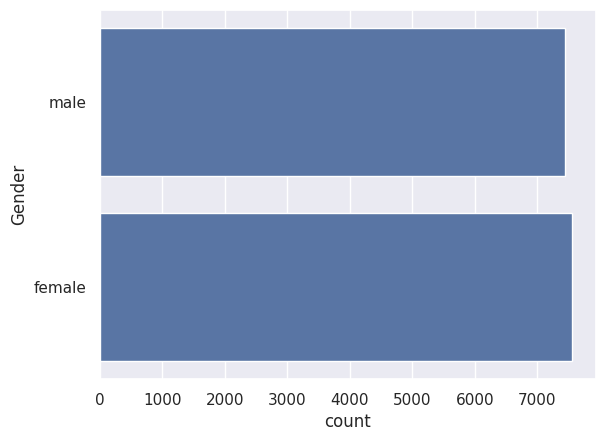

In [51]:
# plotting the gender coloumn in count plot
sns.countplot(calories_data['Gender'])

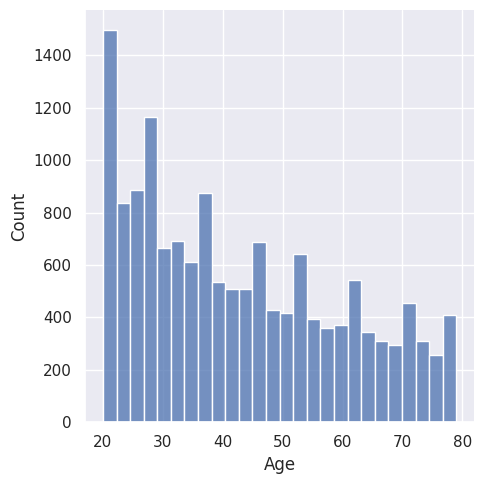

In [52]:
#finding the distribution of "Age" column
sns.displot(calories_data['Age'])

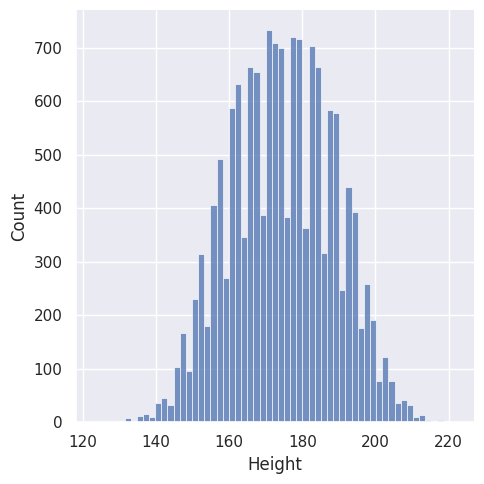

In [53]:

#finding the distribution of "Height" column
sns.displot(calories_data['Height'])

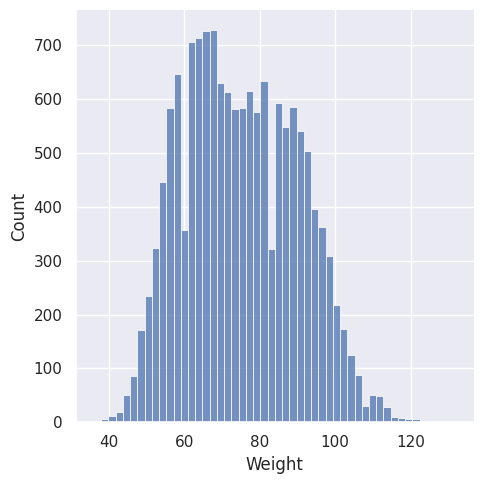

In [54]:
#finding the distribution of "weight" column
sns.displot(calories_data['Weight'])

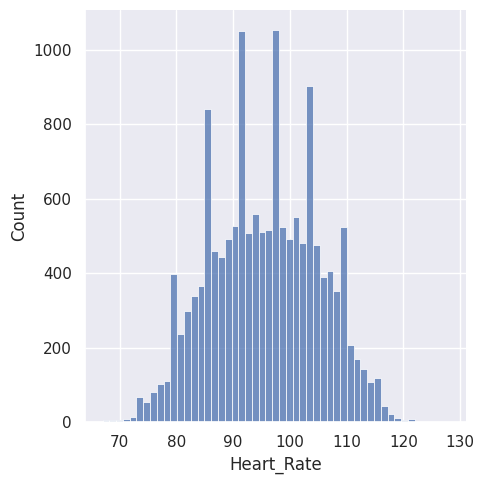

In [55]:
#finding the distribution of "Heart_rate" column
sns.displot(calories_data['Heart_Rate'])

In [56]:
numeric_data = calories_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()


FINDING THE CORRELATION IN THE DATASET


<Axes: >

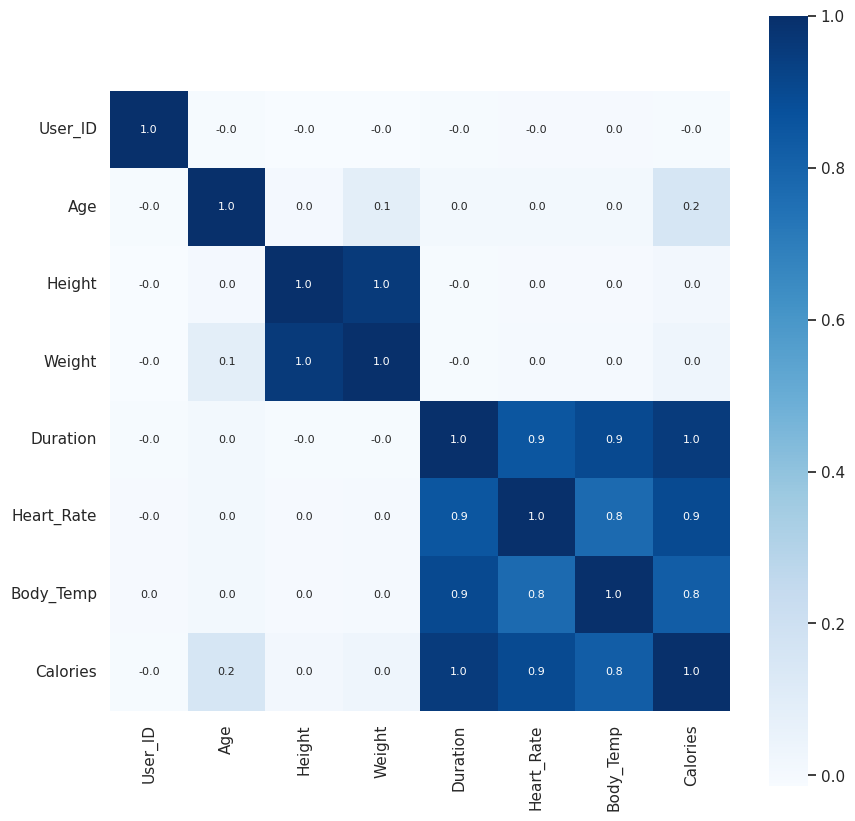

In [57]:
#1.POSITIVE CORRELATION
#2.NEGATIVE CORRELATION

#constructing a heatmap to understand the correaltion
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

CONVERSION OF CATEGORICAL DATA TO NUMERICAL DATA (MALE=0,FEMALE=1)


In [58]:
calories_data['Gender'].replace({'male': 0, 'female': 1}, inplace=True)


In [59]:
calories_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

SEPARATING FEATURES AND TARGET


In [61]:
X=calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y=calories_data['Calories']

In [62]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [63]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [67]:
print(X.shape,X_train,X_test.shape)

(15000, 7)        Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
1154        1   38   169.0    67.0       3.0        85.0       38.5
9804        0   30   194.0    96.0       9.0        91.0       39.6
7919        1   78   182.0    79.0       7.0        84.0       39.4
4854        0   50   171.0    77.0      29.0       111.0       40.8
5947        1   32   172.0    66.0      29.0       105.0       40.8
...       ...  ...     ...     ...       ...         ...        ...
11798       1   49   178.0    71.0      12.0        98.0       39.9
13896       1   67   159.0    58.0      23.0       101.0       40.4
6637        1   25   167.0    64.0      20.0       100.0       40.4
2575        1   36   167.0    64.0      28.0       108.0       40.8
7336        0   30   187.0    88.0      10.0        94.0       40.2

[12000 rows x 7 columns] (3000, 7)


MODEL TRAINING


In [70]:
1#XG_BOOST
2#LOADING THE MODEL
model = XGBRegressor()

In [71]:
#Training the model with X_axis
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

EVALUATION

In [72]:
#Prediction on Test Data
test_data_prediction=model.predict(X_test)

In [74]:

print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


MEAN ABSOLUTE ERROR

In [75]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [76]:
print("Mean absolute Error=",mae)

Mean absolute Error= 1.4833678883314132
